# Multi-Model Medical Data Analysis

*Using cardiovascular disease dataset by Svetlana Ulianova from Kaggle - [LINK](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)*

## Introduction

This is an analysis of various machine learning models and their ability to classify cardiovascular disease in patients. For the scope of this report only a handful of models were chosen. As will be shown these were far from perfect and would not be a reliable diagnostic tool for health care professionals. However in combination with normal procedures they can still be of some assistance.  

## Exploratory Data Analysis

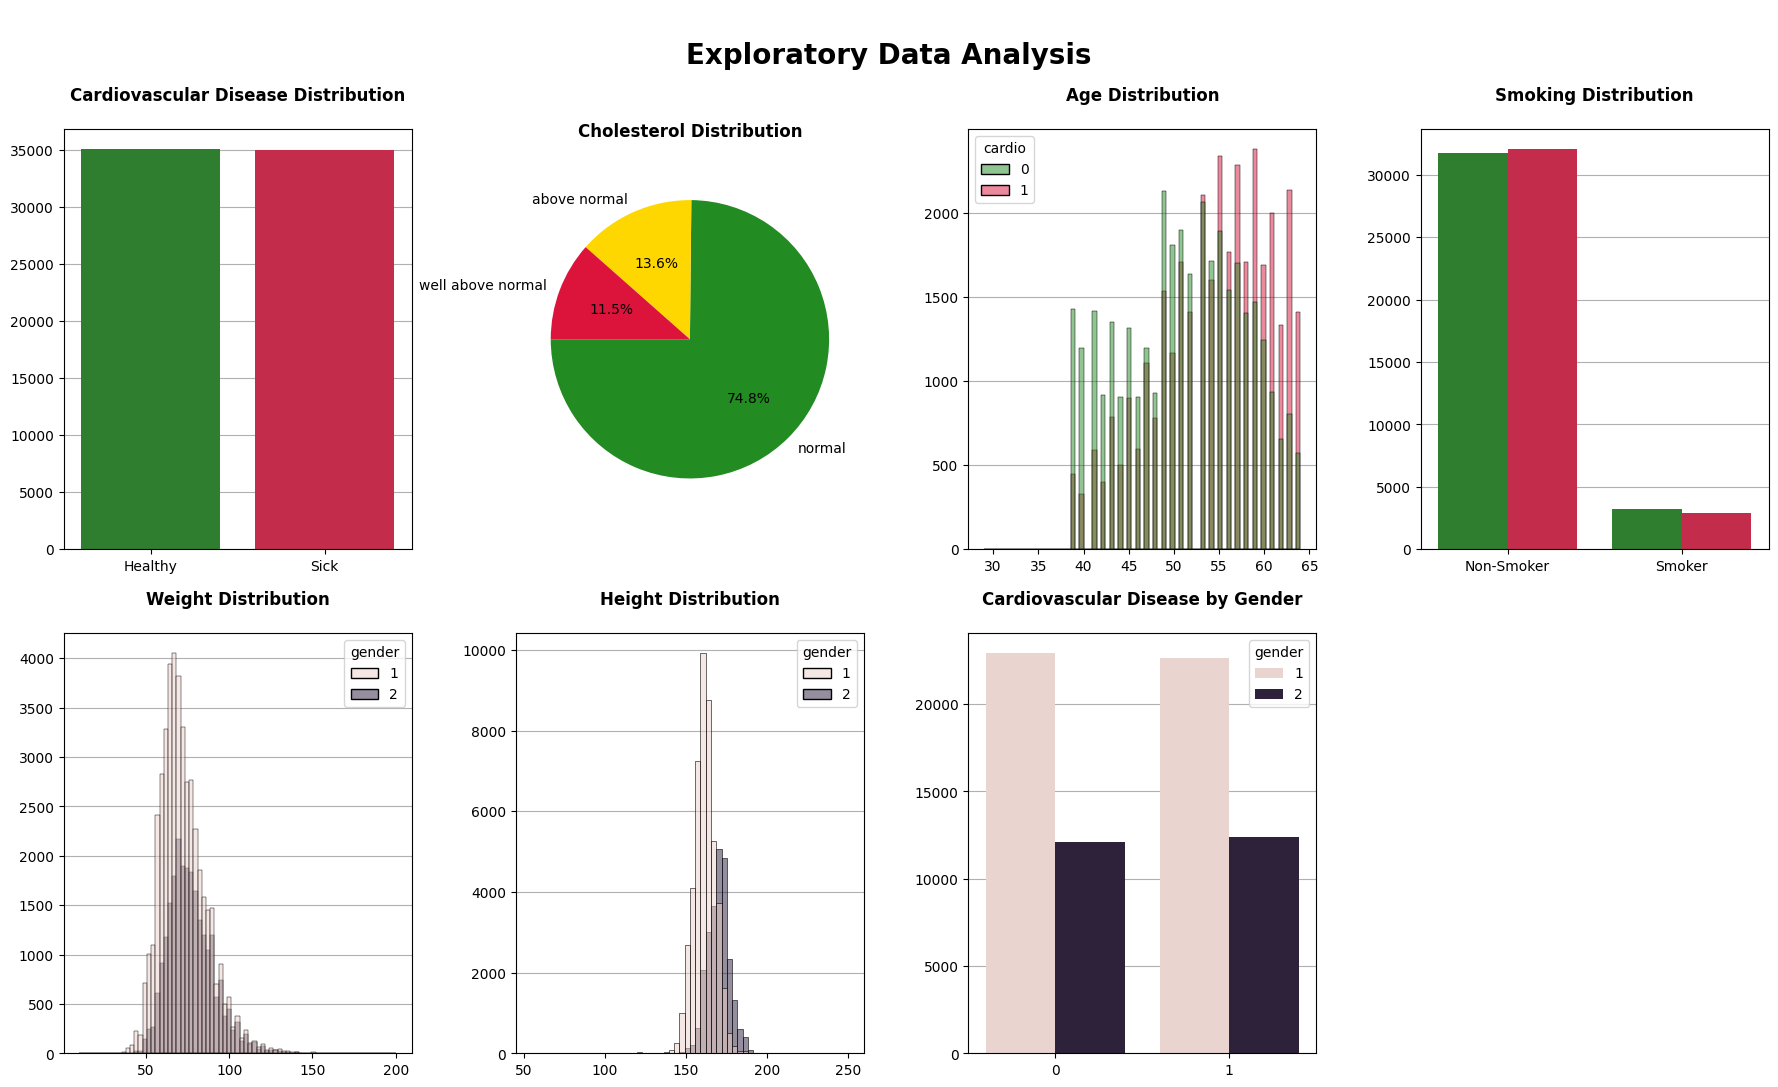

In [1]:
from script import Processing, Visualisation, Modelling
import pandas as pd


pro = Processing("../data/cardio.csv")
df = pro.df
Visualisation.EDA(df)

A visualisation of the dataset was created to get an understanding of the features included. The target variable "cardio" shows a balanced distribution in the first plot, indicating that no weighting was needed. As can be seen in the last plot though the balance does not hold for each gender. Note that the binary labels for gender have not been investigated further. Perhaps a conclusion can be drawn from generalising regarding height and other features if needed.  

As for the other features shown there are larger portions of "good values" (cholesterol, smoking) and the physical aspects are considered somewhat normally distributed. This is all expected of a random sample. 

## Feature Engineering

In [2]:
pro.add_bmi()
df = pro.df
df.head()

,age,gender,height,weight,bmi,bmi_cat,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,22.0,normal,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,34.9,obese cl1,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,23.5,normal,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,28.7,overweight,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,23.0,normal,100,60,1,1,0,0,0,0


The introduction of the BMI features was made to mitigate the effects of collinearity from correlated values such as height and weight.  

$$ \text{BMI} = \frac{\text{weight (kg)}}{\text{height (m)}^2} $$

The ranges for the categorical BMI column were obtained from [Wikipedia](https://en.wikipedia.org/wiki/Body_mass_index#Categories). Here they are strings for clarity but when used in conjunction with the correlation matrix they were labelled numerically. 

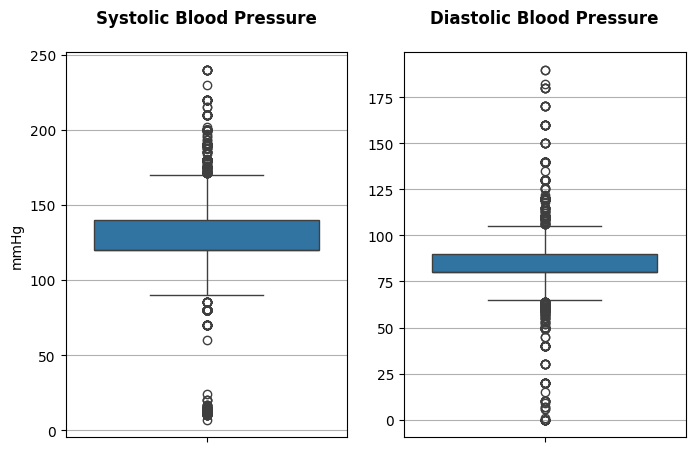

In [3]:
df = df[
    (df["ap_hi"] >= 0) & (df["ap_hi"] <= 250) &
    (df["ap_lo"] >= 0) & (df["ap_lo"] <= 200)
]
Visualisation.boxplot_comparison(df)

The height and weight distributions were deemed fair but the same can not be said for the arterial pressure values. The dataset contained negative and very large values here that were arbitrarily removed with the wide ranges seen above. Still there were way too many outliers.  

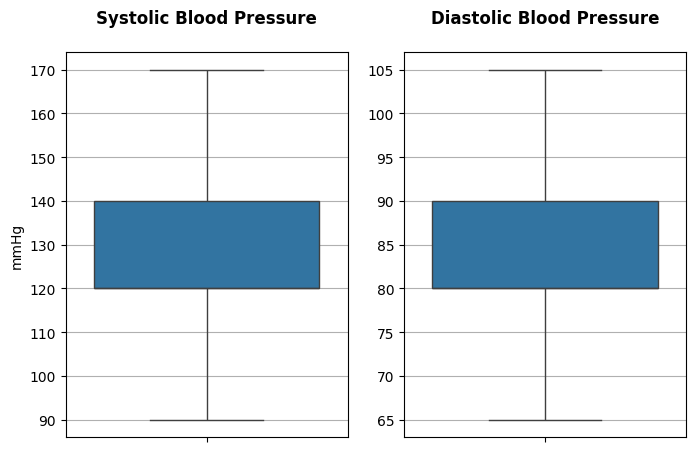

In [4]:
pro.clear_outliers(["ap_lo", "ap_hi"])
df = pro.df
Visualisation.boxplot_comparison(df)

[Healthline](https://www.healthline.com/health/high-blood-pressure-hypertension#definition) provided a guideline on what ranges of systolic and dystolic blood pressure values should be seen as "normal". Included in the implementation here is a lower bound, also mentioned in the article but practiced by UKs NHS. Using those as a basis together with a statistical method (IQR) to clear outliers our dataset now includes data that are within approximately 2.7 deviations from the mean.    

$$ \text{IQR} = Q_3 - Q_1 $$

As with BMI a categorical value was created here as well which can be viewed below. 

In [5]:
pro.add_blood_pressure()
df = pro.df
df.head()

,age,gender,height,weight,bmi,bmi_cat,ap_hi,ap_lo,ap_cat,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,22.0,normal,110,80,hypertension st1,1,1,0,0,1,0
1,20228,1,156,85.0,34.9,obese cl1,140,90,hypertension st2,3,1,0,0,1,1
2,18857,1,165,64.0,23.5,normal,130,70,hypertension st1,3,1,0,0,0,1
3,17623,2,169,82.0,28.7,overweight,150,100,hypertension st2,1,1,0,0,1,1
5,21914,1,151,67.0,29.4,overweight,120,80,hypertension st1,2,2,0,0,0,0


## Further visualisations

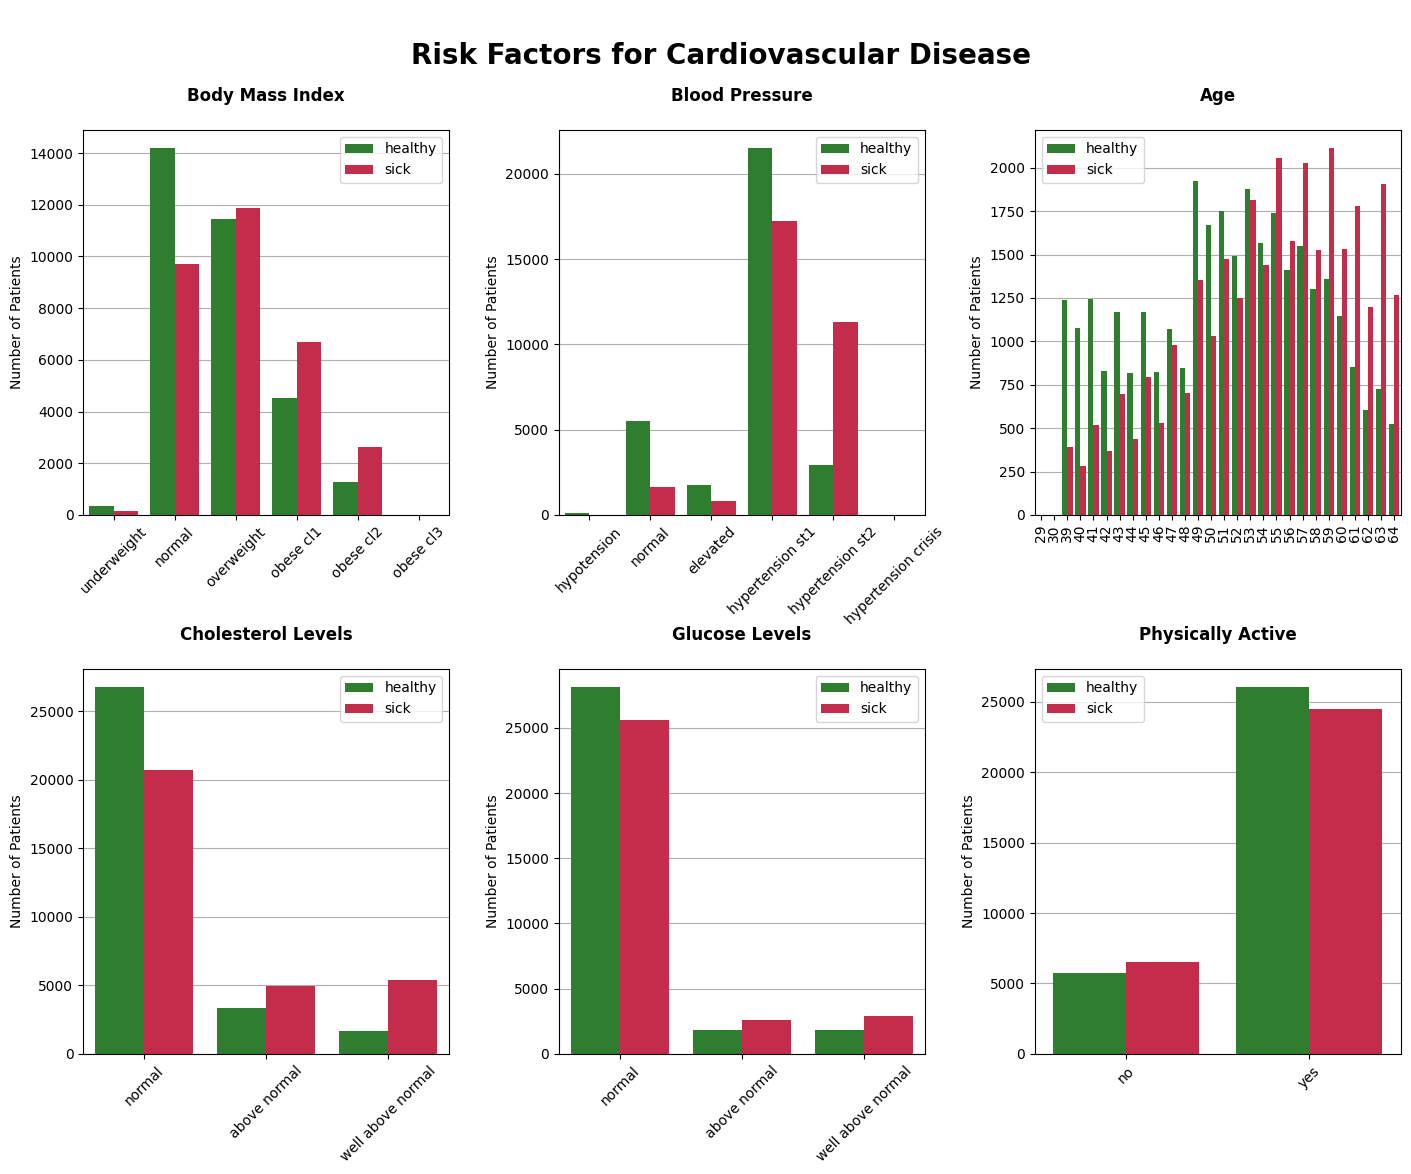

In [6]:
Visualisation.risk_factors(df)

Here the categorical values for BMI and blood pressure are shown in relation to healthy and sick patients. All plots above show an increase of risk together with higher values such as age, cholesterol and glucose. It is only fair to point out that these are not balanced as we've ascertained before but with enough data points show at least a trend towards a possible conclusion. 

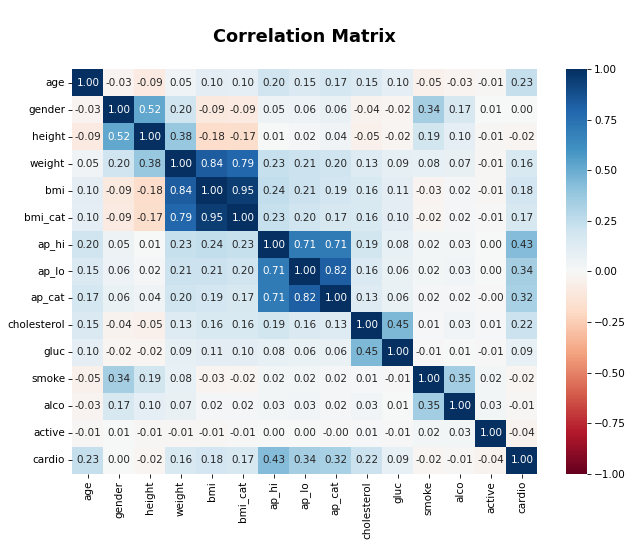

In [7]:
Visualisation.correlation_matrix(df)

As alluded to the collinearity of certain features are clearly visualised in a correlation matrix. This matrix includes all features, independent and dependent. The bottom line is that only the bottom line is of interest in this classification analysis. Though a few comments on other revelations could suggest topics for further study or feature engineering:  

- smoking is weakly correlated with both alcohol consumption and gender  
- gender is correlated with height  
- glucose and cholesterol values are correlated  

## Model

In [6]:
df_num = df.copy().drop(columns=["height", "weight", "bmi_cat", "ap_cat"])
df_cat = df.copy().drop(columns=["height", "weight", "bmi", "ap_hi", "ap_lo"])
df_num = pd.get_dummies(df_num, columns=["gender"])
df_cat = pd.get_dummies(df_cat, columns=["gender", "bmi_cat", "ap_cat"])

Here the data was split into two sets: one set for numerical values and one for categorical values. One-hot encoding was used to vectorise the data, as is beneficial for machine learning. The end result is two sets that contain both nominal data (e.g. gender), ordinal data (e.g. cholesterol) and ratio data (e.g. BMI). Further study can be done with using one-hot encoding on cholesterol and gluc (glucose) to measure the impact of the models.  

Thanks to the feature engineering done previously a selection could be made to remove columns with collinearity (e.g. height, weight) and keep single features containing the same information - simply in another form. 

In [7]:
model_num = Modelling(df_num).split_data().scale_data().tuning()
model_cat = Modelling(df_cat).split_data().scale_data().tuning()


Training log_reg ...


/home/albotgoodman/coding/repos/machine-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/albotgoodman/coding/repos/machine-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/albotgoodman/coding/repos/machine-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/albotgoodman/coding/repos/machine-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/albotgoodman/coding/repos/machine-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarn

KeyboardInterrupt: 

A final note before having a look at the results: during tuning (and training) the chosen scoring is set to recall which will be shown below. The reasoning behind this is that in medicine there might not be a second screening for a truly sick person if the illness was not caught upon first examination.  

Chosing recall aims to make more positive predictions (higher false positives and lower false negatives). Though not a pleasant diagnosis in the short term this leaves room for further examinations where the diagnosis can be corrected. In doing so patients that are ill won't be sent home without treatment. 

## Results

In [11]:
num_scores = model_num.scoreboard("num_scores")
cat_scores = model_cat.scoreboard("cat_scores")
print("Numerical Data Scores:")
display(num_scores.table)
print("\nCategorical Data Scores:")
display(cat_scores.table)

Numerical Data Scores:


,model,best_params,train_score,val_score
0,SGDClassifier(),"{'alpha': 0.001, 'class_weight': 'balanced', '...",0.833571,0.846882
1,LogisticRegression(),"{'C': 0.001, 'max_iter': 10000, 'penalty': 'l1...",0.764245,0.762581
2,RandomForestClassifier(),"{'criterion': 'gini', 'max_depth': None, 'min_...",0.820812,0.696344
3,KNeighborsClassifier(),"{'algorithm': 'brute', 'n_neighbors': 9, 'p': ...",0.730895,0.686452
4,SVC(),"{'C': 10, 'cache_size': 1000, 'gamma': 'auto',...",0.655074,0.663441



Categorical Data Scores:


,model,best_params,train_score,val_score
0,SGDClassifier(),"{'alpha': 1e-06, 'class_weight': 'balanced', '...",0.938689,0.938065
1,RandomForestClassifier(),"{'criterion': 'gini', 'max_depth': None, 'min_...",0.800129,0.669462
2,KNeighborsClassifier(),"{'algorithm': 'ball_tree', 'n_neighbors': 9, '...",0.710489,0.657419
3,LogisticRegression(),"{'C': 100, 'max_iter': 10000, 'penalty': 'l1',...",0.619927,0.629247
4,SVC(),"{'C': 1, 'cache_size': 1000, 'gamma': 'auto', ...",0.595421,0.595699


In [ ]:
print(f"Numerical Data Mean: {num_scores.table["val_score"].mean():.6f}")
print(f"Categorical Data Mean: {cat_scores.table["val_score"].mean():.6f}")

Numerical Data Mean: 0.731140
Categorical Data Mean: 0.697978


Since all models will be used in conjunction but only one dataset the mean value of each dataset's validation score is a good foundation for deciding which to chose. 

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      9515
           1       0.73      0.72      0.72      9334

    accuracy                           0.73     18849
   macro avg       0.73      0.73      0.73     18849
weighted avg       0.73      0.73      0.73     18849



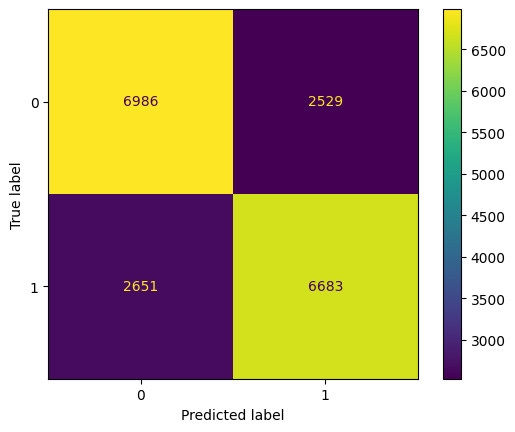

In [17]:
ensemble = Modelling(df_num)
ensemble.voting_split()
ensemble._table = num_scores.table.copy()
vote_clf = ensemble.voting()
ensemble.evaluation(vote_clf)

## Discussion

There have been a few points of interest for further study mentioned so far. The suggestions highlighted here have the potential to change the results the most.  

First and foremost a deeper study and understanding of the features could be beneficial in further feature engineering and selection. Current models might be hamstrung by features that impact the results negatively or there are new columns that can be found in the same manner as BMI or blood pressure. There might also be a necessity to add weights since not all features are as balanced as cardio.   

Secondly the choice to use recall for scoring and tuning might have it's downsides. Though perhaps not in the same way as relying on accuracy which might only vote on the majority. However there are other metrics that can be used (e.g. ROC-AUC) or implemented in another way than was done here.   

Finally, the most important factor might be the chosen models, their parameters and values. Further hyperparameter optimisation could perhaps push the score over the infamous 80 percent mark. There might still be a risk of optimising well for this specific dataset which we know very little about. Is the sample from only one hospital, one region, one nation? Are certain people overrepresented? What are the normal living conditions for the patients?  

# Visuals for scores

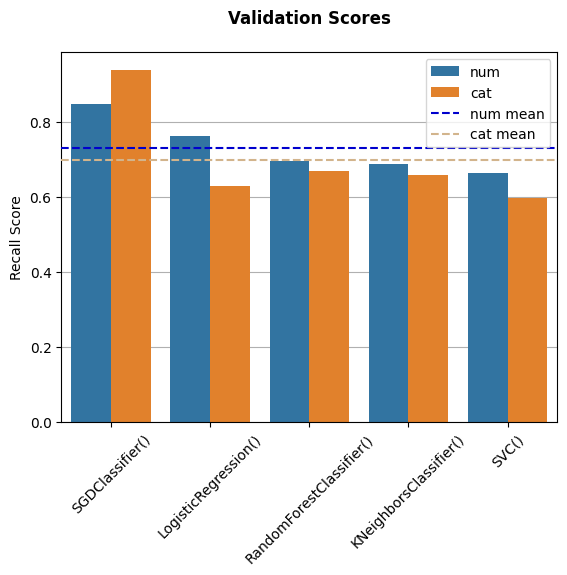

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

num = pd.read_csv("scores/num_scores.csv")
cat = pd.read_csv("scores/cat_scores.csv") # can be done in another way in script

num_val_mean = num["val_score"].mean()
cat_val_mean = cat["val_score"].mean()

num["dataset"] = "num"
cat["dataset"] = "cat"
cols = ["dataset", "model", "best_params", "train_score", "val_score"]
num = num[cols]
cat = cat[cols]
df = pd.concat([num, cat], ignore_index=True)

sns.barplot(data=df, x="model", y="val_score", hue="dataset", zorder=2)
plt.axhline(y=num_val_mean, color="mediumblue", linestyle="--", label="num mean", zorder=3)
plt.axhline(y=cat_val_mean, color="tan", linestyle="--", label="cat mean", zorder=3)
plt.xticks(rotation=45)
plt.title("Validation Scores\n", fontweight="bold")
plt.ylabel("Recall Score")
plt.xlabel("")
plt.grid(axis="y")
plt.legend()
plt.show()

# Note to self

- don't run anything else for now
- check on the output of the tuning cell (does it show time with no errors?)
- add and commit EVERYTHING, push
- pull on laptop
- try to implement the visuals above in the script (can be tinkered with in a test file)
- use visuals instead of tables above
- comment on the confusion matrix and all that
- check the instructions once more and how the report and script stacks up